### Implemented LogisticRegression from scratch making use of vectorization and broadcasting within Python. 

#### Compared the results obtained with RandomForestClassifier and LogisticsRegression provided within scikit learn

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from  sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

%matplotlib inline

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


def load_data(path):
    return pd.read_excel(path)

In [80]:
def preprocess_data(df, remove_columns):
    df.replace("?", np.NaN,inplace= True)
    df.drop(remove_columns,axis=1,inplace=True)
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df.dropna(inplace=True)
    return df

In [120]:
remove_columns = ['PassengerId','Name','Ticket']
path = 'dataset/titanic.xlsx'

def feature_encoding(df):
    model = LabelEncoder()
    for col in df:
        if(df[col].dtype == 'object'):
            df[col] = model.fit_transform(df[col])
    return df

df = load_data(path)
df = preprocess_data(df, remove_columns)
df = feature_encoding(df)
df.head()
item = []
from sklearn.linear_model import LinearRegression


df_temp = df.drop('Survived',axis=1)
for k, v1 in enumerate(df_temp.columns.values):
    for k , v2 in enumerate(df_temp.columns.values):
        reg = LinearRegression()
        reg.fit([df_temp[v1].values,df_temp[v2].values], df['Survived'])
        y_pred = reg.predict(zip(df_temp[[v1]],df_temp[[v2]]))
        mse = ((y_pred - df['Survived'].values)**2).mean()
        if mse < mseMin:
            mseMin = mse
             

print(item)
df_temp.columns[item.index(min(item))]


ValueError: Found input variables with inconsistent numbers of samples: [2, 202]

In [ ]:
def split_data(df):

In [3]:
    y = df['Survived']
    X = df.drop(['Survived'],axis=1)
    return train_test_split(X, y , test_size=0.2,random_state = 0)

In [5]:
remove_columns = ['PassengerId','Name','Ticket']
path = 'dataset/titanic.xlsx'

data = load_data(path)
data = preprocess_data(data, remove_columns)
data = feature_encoding(data)
X_train, X_test, y_train, y_test = split_data(data)

NameError: name 'pd' is not defined

In [6]:
def class_split(df):
    return df.groupby('Survived').size()*100/data.shape[0]
print(class_split(data))

NameError: name 'data' is not defined

In [7]:
# Base-line Random Forest Classifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

NameError: name 'RandomForestClassifier' is not defined

In [8]:
# Feature Importance

plt.bar(X_train.columns, clf.feature_importances_)

NameError: name 'plt' is not defined

In [17]:
# Best Random Forest Classifier Model Search 
# using built-in model from scikit learn

def ApplyRandomForestClassifierModel(X, y):
    n_estimators = range(100,2000,500)
    max_leaf_nodes = range (2, 10, 1)
    max_depth = range(5,10, 1)
    
    clf = RandomForestClassifier(n_estimators=500)
    parameters = {'n_estimators':n_estimators, 'bootstrap':[0,1], 'criterion':('gini','entropy'), 'max_leaf_nodes': max_leaf_nodes, 'max_depth':max_depth}
    b_model = GridSearchCV(clf,parameters)
    b_model.fit(X, y)
    print(b_model.best_estimator_)
    print(b_model.best_score_)

ApplyRandomForestClassifierModel(X_train, y_train)

In [163]:
def fn_sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def fn_loss(y, y_hat,instances):
    return - np.sum((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))/instances

def fn_predict_prob(X, W, b):
    return fn_sigmoid(np.dot(W.T,X.T) + b)
            

def fn_predict(y, threshold):
    return  (y >= threshold).astype(int)

def BuildVectorizedLogisticsRegressionModel(X_train, y_train, X_test, y_test, iterations, learningRate):
    features = X_train.shape[1]
    instances = X_train.shape[0]
    
    W = np.zeros([features,1])
    b = 0
    X = X_train.T
    y = y_train.values.reshape(1,instances)
    
    for i in range(iterations):
        Z = np.dot(W.T, X) + b
        A = fn_sigmoid(Z)
        dZ = A - y
        dW = np.dot(X, dZ.T)/instances
        dB = np.sum(dZ)/instances
  
        W -= learningRate * dW
        b -= learningRate * dB 
    return W, b

W, b = BuildVectorizedLogisticsRegressionModel(X_train, y_train, X_test, y_test, 100000, 0.0005)
y_hat = fn_predict_prob(X_test, W, b)

In [168]:
y_predict = fn_predict(y_hat, 0.65)
(y_predict == y_test.values.reshape(1, y_test.shape[0])).mean()

0.70731707317073167

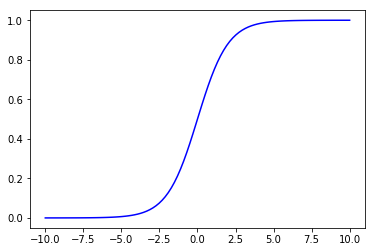

In [46]:
def checkSigmoid():
    test = plt.linspace(-10,10,100)
    plt.plot(test, sigmoid(test), 'b', label='linspace(-10,10,100)')
    plt.show()

checkSigmoid()

In [30]:
# Best Random Forest Classifier Model Search 
# using built-in model from scikit learn

def ApplyLogisticRegressionClassifierModel():
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    print(clf.score(X_test, y_test))

ApplyLogisticRegressionClassifierModel()
    

0.731707317073
